In [2]:
import pandas as pd

housing_df=pd.read_csv('C:/scripts/capstone2/housing_df2.csv', index_col=0)
housing_df.head()

,ASPUS_3A_PCT_CHG,H_RATIO_3A_PCT_CHG,HSN1F_3A_PCT_CHG,PERMIT_3A_PCT_CHG,STOCK_MKT_3A_PCT_CHG,BAA_YEILD_10Y_2A_PCT_CHG,US10Y_3A_PCT_CHG,RPCE_A_PCT_CHG,UEMP_3A_PCT_CHG,RGDP_M_PCT_CHG
DATE,,,,,,,,,,
1/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.164384
2/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.164384
3/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.196721
4/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,-0.244898
5/1/1962,0.103627,0.170213,-0.086294,0.037433,-3.199388,-0.28,0.02451,-0.116279,-0.207031,0.117117


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 58.8+ KB


ASPUS_3A_PCT_CHG            US Average housing price movement (3 years % change)

H_RATIO_3A_PCT_CHG          Housing Ratio: Number of house available vs. sold. (3 years % change)

HSN1F_3A_PCT_CHG            New 1F House sold (3 years % change)

PERMIT_3A_PCT_CHG           Current construction permits across USA (3 years % change)

STOCK_MKT_3A_PCT_CHG        Stock market movement (3 years % change)

BAA_YEILD_10Y_2A_PCT_CHG    Bond Market movement (2 years % change)

US10Y_3A_PCT_CHG            US 10 Years Treasury Rate (3 years % change)

RPCE_A_PCT_CHG              Personal consumer expenditures (1 years % change)

UEMP_3A_PCT_CHG             Long Term Unemployment Rate (3 years % change)

RGDP_M_PCT_CHG              Current US GDP (3 years % change)



In [5]:
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used
import numpy as np
# Construct data for the model
type(housing_df)
#type(model)
housing_df.info()
X = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
y = np.array(housing_df['ASPUS_3A_PCT_CHG'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 58.8+ KB
size of the training feature set is (547, 9)
size of the test feature set is (137, 9)
size of the training Target set is (547,)
size of the test Target set is (137,)


# Linear regression

In [6]:
from sklearn.linear_model import LinearRegression #import from sklearn
linear_reg= LinearRegression() # instantiated linreg
linear_reg.fit(X_train,y_train) #fit the model

#predict using X_test
predicted_train= linear_reg.predict(X_train)
predicted_test= linear_reg.predict(X_test)

from sklearn.metrics import mean_squared_error # import mse from sklearn
#calculate root mean squarred error
rmse_train=np.sqrt(mean_squared_error(y_train, predicted_train))
rmse_test=np.sqrt(mean_squared_error(y_test, predicted_test))

print('The train root mean squarred error is :', rmse_train)
print('The test root mean squarred error is :', rmse_test)

print('The Linear Regression coefficient parameters are :', linear_reg.coef_ )
print('The Linear Regression intercept value is :', linear_reg.intercept_)

from sklearn import metrics # import metrics from sklearn

Rsquared=linear_reg.score(X_train,y_train) # to determine r square Goodness of fit

# how good the model fits the training data can be determined by R squared metric which is here 0.12
Rsquared
print('The R squared metric is :', Rsquared)

The train root mean squarred error is : 0.11189417013121745
The test root mean squarred error is : 0.11556063834363067
The Linear Regression coefficient parameters are : [ 0.04182125  0.21446637 -0.07073799  0.00134644 -0.00772195  0.21773385
  0.00599973 -0.0770209   0.00099034]
The Linear Regression intercept value is : 0.170767518777298
The R squared metric is : 0.3324038459224431


The R^2 in scikit learn is the coefficient of determination. It is 1 - residual sum of square / total sum of squares.

RMSE of the test data is closer to the training RMSE (and lower) if you have a well trained model. It will be higher if we have an overfitted model.

Since R^2 = 1 - RSS/TSS, the only case where RSS/TSS > 1 happens when our model is even worse than the worst model assumed (which is the absolute mean model).

here RSS = sum of squares of difference between actual values(yi) and predicted values(yi^) and TSS = sum of squares of difference between actual values (yi) and mean value (Before applying Regression). So you can imagine TSS representing the best(actual) model, and RSS being in between our best model and the worst absolute mean model in which case we'll get RSS/TSS < 1. If our model is even worse than the worst mean model then in that case RSS > TSS(Since difference between actual observation and mean value < difference predicted value and actual observation).

# K fold cross validation


In [7]:
# cross validation score
cv_score= cross_val_score(LinearRegression(),X,y,scoring='neg_mean_squared_error', cv=10) # k =10
print('cv_score is :', cv_score)

# mean squared error
print('cv_score is :', cv_score.mean())

# Root mean squared error
rmse_cv= np.sqrt(cv_score.mean() * -1)
print('The cross validation root mean squarred error is :', rmse_cv)

cv_score is : [-0.00846139 -0.02480723 -0.05623692 -0.02185939 -0.02657064 -0.0169021
 -0.00375804 -0.00803476 -0.02712047 -0.02857531]
cv_score is : -0.022232625171923696
The cross validation root mean squarred error is : 0.14910608697140335


with Linear regressor we are able to predict the model with .114 RMSE and r squared 0.33 and cross validation root mean squarred error is : 0.1507

# Fitting Linear Regression using statsmodels

Statsmodels is a great Python library for a lot of basic and inferential
 statistics. It also provides basic regression functions using an R-like
 syntax, so it's commonly used by statisticians. While we don't cover
 statsmodels officially in the Data Science Intensive workshop,
 it's a good library to have in your toolbox. Here's a quick example
 of what you could do with it. The version of least-squares we will use
 in statsmodels is called ordinary least-squares (OLS). There are many
 other versions of least-squares such as partial least squares (PLS)
 and weighted least squares (WLS).

In [15]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m_H_RATIO_3A = ols('y ~ H_RATIO_3A_PCT_CHG',housing_df).fit()
print(m_H_RATIO_3A.summary())

m_HSN1F_3A = ols('y ~ HSN1F_3A_PCT_CHG',housing_df).fit()
print(m_HSN1F_3A.summary())

m_PERMIT_3A = ols('y ~ PERMIT_3A_PCT_CHG',housing_df).fit()
print(m_PERMIT_3A.summary())

m_STOCK_MKT_3A = ols('y ~ STOCK_MKT_3A_PCT_CHG',housing_df).fit()
print(m_STOCK_MKT_3A.summary())

m_BAA_YEILD_10Y_2A = ols('y ~ BAA_YEILD_10Y_2A_PCT_CHG',housing_df).fit()
print(m_BAA_YEILD_10Y_2A.summary())

m_US10Y_3A = ols('y ~ US10Y_3A_PCT_CHG',housing_df).fit()
print(m_US10Y_3A.summary())

m_RPCE_A = ols('y ~ RPCE_A_PCT_CHG',housing_df).fit()
print(m_RPCE_A.summary())

m_UEMP_3A = ols('y ~ UEMP_3A_PCT_CHG',housing_df).fit()
print(m_UEMP_3A.summary())


m_GDP_M = ols('y ~ RGDP_M_PCT_CHG',housing_df).fit()
print(m_GDP_M.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.667
Date:                Wed, 27 Mar 2019   Prob (F-statistic):             0.0559
Time:                        20:20:02   Log-Likelihood:                 395.06
No. Observations:                 684   AIC:                            -786.1
Df Residuals:                     682   BIC:                            -777.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1748      0

In [13]:
m_rcpi = ols('y ~ H_RATIO_3A_PCT_CHG + HSN1F_3A_PCT_CHG + PERMIT_3A_PCT_CHG + STOCK_MKT_3A_PCT_CHG + BAA_YEILD_10Y_2A_PCT_CHG + US10Y_3A_PCT_CHG + RPCE_A_PCT_CHG + UEMP_3A_PCT_CHG + RGDP_M_PCT_CHG',housing_df).fit()
print(m_rcpi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     34.77
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           1.76e-50
Time:                        20:16:11   Log-Likelihood:                 523.64
No. Observations:                 684   AIC:                            -1027.
Df Residuals:                     674   BIC:                            -982.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

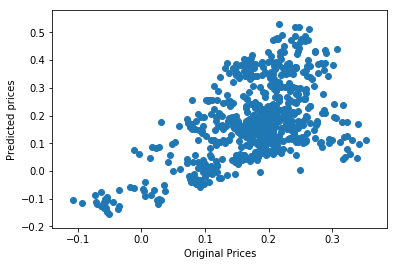

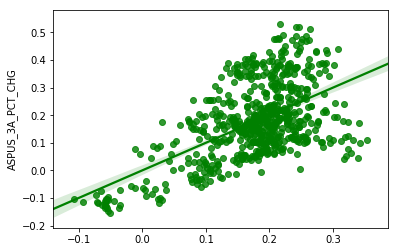

In [20]:
fdval = m_rcpi.fittedvalues
y
plt.scatter(fdval, y)

#plt.xlim(3,8)
#plt.ylim(0,1)
plt.ylabel('Predicted prices')
plt.xlabel('Original Prices')
plt.show()
sns.regplot(x=fdval, y="ASPUS_3A_PCT_CHG", data=housing_df, fit_reg = True, color='g')
plt.show()

# Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.


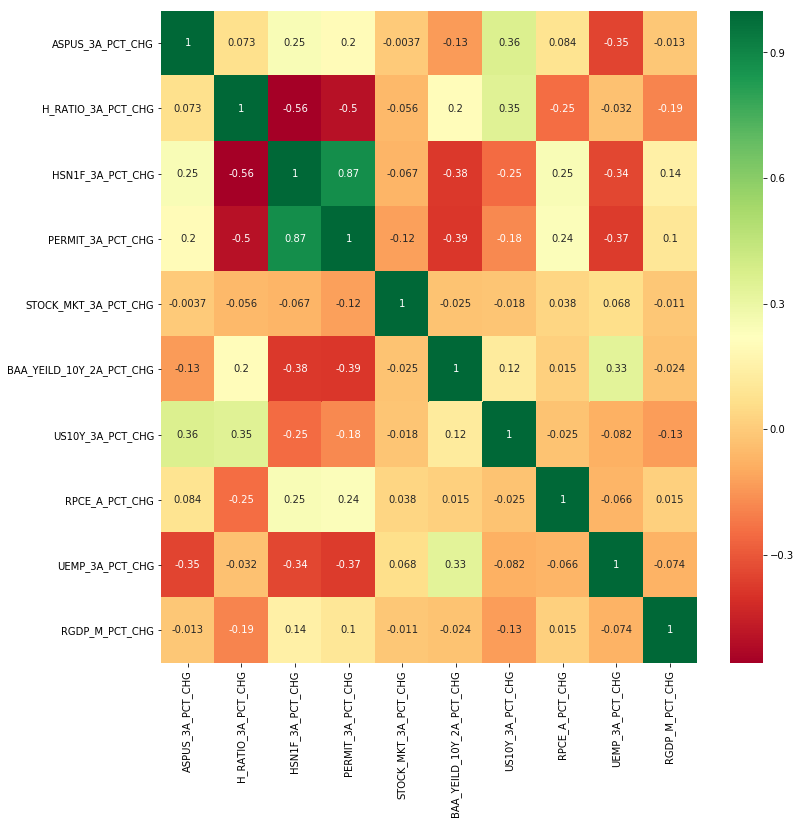

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

X = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
y = np.array(housing_df['ASPUS_3A_PCT_CHG'])

#get correlations of each features in dataset
corrmat = housing_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(housing_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Number of new 1F house sold is positively (0.87) correllated with construction permits

Number of new 1F house sold is negatively (-0.56) correllated with Housing supply ratio

US Ave Houe price is negatively (-0.35) correllated with US Unemployment rate

Number of new 1F house sold is positively (0.87) correllated with construction permit

# Monthly housing DATA  ERROR TESTING 

In [22]:
h_m_df = pd.read_csv('C:/scripts/capstone2/h_m_df.csv', index_col='DATE', parse_dates=True)
h_m_df.head()

,ASPUS_M,H_RATIO_M,HSN1F_M,PERMIT_M,STOCK_MKT_M,BAA10YM,US10Y_M,RPCE_M,LRUN_UEMP,GDP_M
DATE,,,,,,,,,,
1962-01-01,19300.0,4.7,591,1122,-1.194624,1.00,4.08,4.30,6.536096,7.300000
1962-02-01,19300.0,4.7,591,1194,-4.306072,1.03,4.04,4.53,6.202647,6.100000
1962-03-01,19300.0,4.7,591,1134,-7.417520,1.11,3.93,4.77,5.869198,4.900000
1962-04-01,19300.0,4.7,591,1235,-10.528967,1.18,3.84,5.00,5.535749,3.700000
1962-05-01,19300.0,4.7,591,1142,-9.215257,1.13,3.87,4.40,5.437348,4.133333


In [23]:
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used

# Construct data for the model
type(housing_df)
#type(model)
housing_df.info()
X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)

#Linear regression
from sklearn.linear_model import LinearRegression #import from sklearn
linear_reg= LinearRegression() # instantiated linreg
linear_reg.fit(X_train,y_train) #fit the model

#predict using X_test
predicted_train= linear_reg.predict(X_train)
predicted_test= linear_reg.predict(X_test)

from sklearn.metrics import mean_squared_error # import mse from sklearn
#calculate root mean squarred error
rmse_train=np.sqrt(mean_squared_error(y_train, predicted_train))
rmse_test=np.sqrt(mean_squared_error(y_test, predicted_test))

print('The train root mean squarred error is :', rmse_train)
print('The test root mean squarred error is :', rmse_test)

print('The Linear Regression coefficient parameters are :', linear_reg.coef_ )
print('The Linear Regression intercept value is :', linear_reg.intercept_)

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 58.8+ KB
size of the training feature set is (547, 9)
size of the test feature set is (137, 9)
size of the training Target set is (547,)
size of the test Target set is (137,)
The train root mean squarred error is : 70267.9274598809
The test root mean squarred error is : 77818.89478743549
The Linear Regression coefficient parameters are : [  1788.79238781    216

In [24]:
from sklearn import metrics # import metrics from sklearn

Rsquared=linear_reg.score(X_train,y_train) # to determine r square Goodness of fit

# how good the model fits the training data can be determined by R squared metric which is here 0.12
Rsquared
print('The R squared metric is :', Rsquared)

### K fold cross validation
# cross validation score
cv_score= cross_val_score(LinearRegression(),X,y,scoring='neg_mean_squared_error', cv=10) # k =10
print('cv_score is :', cv_score)

# mean squared error
print('cv_score is :', cv_score.mean())

# Root mean squared error
rmse_cv= np.sqrt(cv_score.mean() * -1)
print('The cross validation root mean squarred error is :', rmse_cv)

The R squared metric is : 0.5920916319701549
cv_score is : [-2.57665069e+10 -1.61669379e+10 -1.03717946e+10 -1.76948981e+10
 -2.55151868e+09 -8.69185339e+08 -1.53999991e+09 -7.50618593e+09
 -9.81639039e+09 -3.87875614e+10]
cv_score is : -13107097921.85672
The cross validation root mean squarred error is : 114486.23463917713


We will now display the aggregate mean values of each time series in the monthly housing DataFrame.


Extract the year for each of the dates in the index of h_m_df and assign them to index_year.
Compute the monthly mean unemployment rate in jobs and assign it to jobs_by_year.
Plot all the columns of price_by_year.
To extract the year for each date, use the .index.year attribute

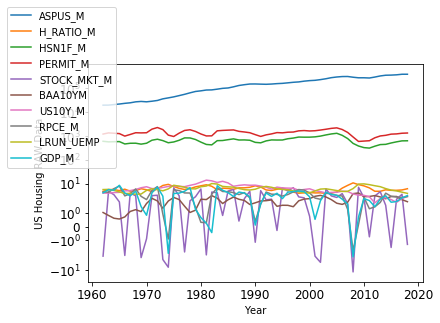

In [25]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = h_m_df.index.year

# Compute the mean unemployment rate for each year
h_m_df_by_year = h_m_df.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = h_m_df_by_year.plot(fontsize=12, linewidth=1.5)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('US Housing RAW Data', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.yscale('symlog',basey=10)
plt.show()

'''Averaging time series values by month shows that unemployment rate tends to be a lot higher during the winter months for the Agriculture and Construction industry. The increase in unemployment rate after 2008 is very clear when average time series values by year.'''


'''Apply time series decomposition to our dataset
We will now perform time series decomposition on multiple time series. We can achieve this by leveraging the Python dictionary to store the results of each time series decomposition.

Here, we will initialize an empty dictionary with a set of curly braces, {}, use a for loop to iterate through the columns of the DataFrame and apply time series decomposition to each time series. After each time series decomposition, we will place the results in the dictionary by using the command my_dict[key] = value, where my_dict is our dictionary, key is the name of the column/time series, and value is the decomposition object of that time series.


Initialize an empty dictionary called h_m_df_decomp.
Extract the column names of the housing DataFrame and place the results in a list called h_m_df_names.
Iterate through each column in h_m_df_names and apply time series decomposition to that time series. Place the results in the h_m_df_decomp dictionary, where the column name is the key, and the value is the decomposition of the time series just performed.

The columns of a DataFrame can be accessed by using the .columns attribute.
The basic structure of a for loop is:
for item in list:
    perform command'''

In [27]:
h_m_df_decomp = {}

# Get the names of each time series in the DataFrame
h_m_df_names = h_m_df.columns

# Run time series decomposition on each time series of the DataFrame
for ts in h_m_df_names:
    ts_decomposition = sm.tsa.seasonal_decompose(h_m_df[ts])
    h_m_df_decomp[ts] = ts_decomposition

Now we've performed time series decomposition on all the time series in the monthly housing DataFrame. Let's try and plot them!'''


'''Visualize the seasonality of multiple time series
We will now extract the seasonality component of h_m_df_decomp to visualize the seasonality in these time series. Note that before plotting, you will have to convert the dictionary of seasonality components into a DataFrame using the pd.DataFrame.from_dict() function.

An empty dictionary h_m_df_seasonal and the time series decompisiton object h_m_df_decomp created.


Iterate through each column name in jobs_names and extract the corresponding seasonal component from h_m_df_decomp. Place the results in the jobs_seasonal, where the column name is the name of the time series, and the value is the seasonal component of the time series.
Convert h_m_df_seasonal to a DataFrame and call it seasonality_df.
Create a facetted plot of all 10 columns in seasonality_df. Ensure that the subgraphs do not share y-axis.

The seasonal component can be extracted using the .seasonal attribute.
Use the pd.DataFrame.from_dict() to convert a dictionary to a DataFrame.
Faceted plots of DataFrame df can be generated by setting the subplots argument to True.'''

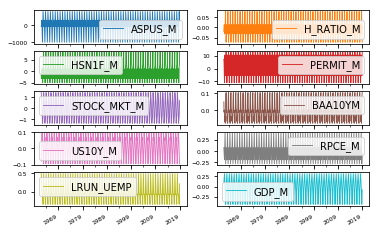

In [29]:
# Extract the seasonal values for the decomposition of each time series
h_m_df_seasonal = {}

for ts in h_m_df_names:
    h_m_df_seasonal[ts] = h_m_df_decomp[ts].seasonal

# Create a DataFrame from the housing_seasonal dictionnary
seasonality_df = pd.DataFrame.from_dict(h_m_df_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(5, 2),
                   sharey=False,
                   fontsize=6,
                   linewidth=0.9,
                   legend=True)

# Show plot
plt.show()


Each time series in the h_m_df DataFrame have very different seasonality patterns!'''

Correlations between multiple time series
Earlier, we have extracted the seasonal component of each time series in the h_m_df DataFrame and stored those results in new DataFrame called seasonality_df. In the context of h_m_df data, it can be interesting to compare seasonality behavior, as this may help uncover which h_m_df indicators are the most similar or the most different.

This can be achieved by using the seasonality_df DataFrame and computing the correlation between each time series in the dataset. Here, we will compute and create a clustermap visualization of the correlations between time series in the seasonality_df DataFrame.

Compute the correlation between all columns in the seasonality_df DataFrame using the spearman method and assign the results to seasonality_corr.
Create a new clustermap of your correlation matrix.

Use the .corr() method along with the method argument to create a correlation matrix.
To plot a clustermap, use the sns.clustermap() function.
'''

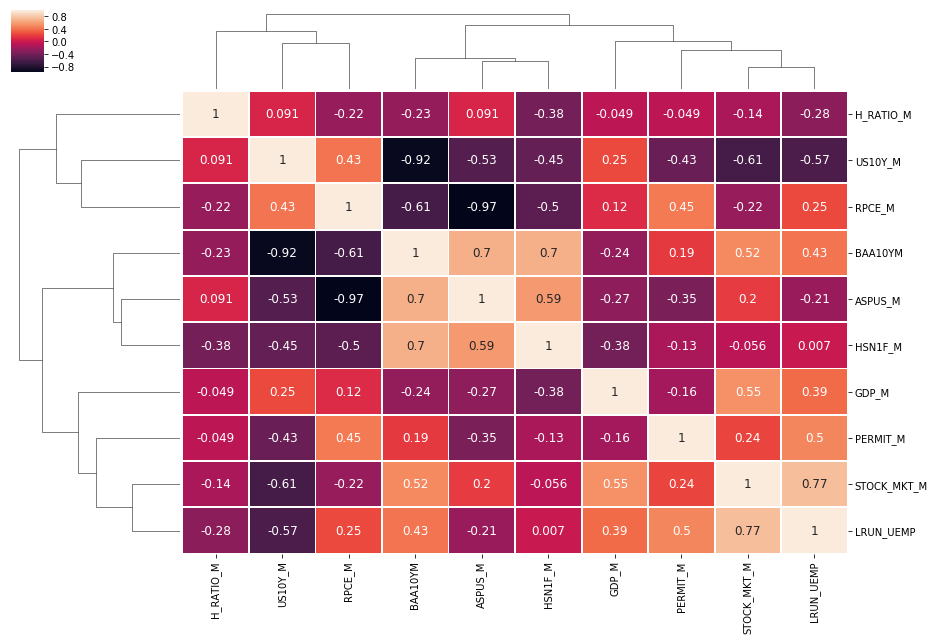

In [30]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 12}, linewidths=.8, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

#  RAW Data (h_m_df) ML Lin Reg

In [31]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
# Prepare input and output DataFrames
X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

size of the training feature set is (547, 9)
size of the test feature set is (137, 9)
size of the training Target set is (547,)
size of the test Target set is (137,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
new_inputs1 = np.array([[ 8.60000000e+00,  2.21000000e+02,  1.32600000e+03,  -7.88567149e+00,  2.30000000e+00,  3.83000000e+00,   3.80000000e+00,  4.62318061e+00,  3.60000000e+00],
       [ 2.50000000e+00,  6.85000000e+02,  19.30000000e+02,   13.10174247e+00,  7.12000000e+00,  0.72000000e+00,   4.43000000e+00,  2.79994189e+00,  9.00000000e-01],
       [12.30000000e+00,  12.07400000e+03,  11.86700000e+03,  -9.36840249e-01,  0.67000000e+00,  1.11000000e+00,   1.27000000e+00,  14.69406217e+00,  2.00000000e-01],
       [ 0.30000000e+00,  9.00000000e+02,  1.65100000e+03,   12.46476236e+00,  2.11000000e+00,  1.26000000e+00,   4.70000000e+00,  4.08157421e+00,  5.50000000e+00],
       [ 4.50000000e+00,  8.12000000e+02,  1.46100000e+03,   1.61322058e+00,  1.92000000e+00,  5.77000000e+00,   4.33000000e+00,  6.91357601e+00,  4.46666667e+00],
       [ 16.80000000e+00,  6.66000000e+02,  1.51400000e+03,  -1.06550895e+01,  1.89000000e+00,  9.42000000e+00,   2.13000000e+00,  5.76349116e+00,  5.83333333e+00],
       [ 6.20000000e+00,  2.15000000e+02,  9.76000000e+02,  2.83633570e+00,  2.33000000e+00,  2.34700000e+00,   1.27000000e+00,  3.40560669e+00,  4.30000000e+00],
       [ 18.90000000e+00,  4.77000000e+02,  7.09000000e+02,   1.34337920e+01,  2.75000000e+00,  7.73000000e+00,   5.60000000e+00,  8.90922651e+00,  3.33333333e-01],
       [5.20000000e+00,  5.11000000e+02,  1.38900000e+03,  -7.64093873e-01,  1.20000000e+00,  6.03000000e+00,   3.60000000e+00,  3.49405492e+00,  4.80000000e+00],
       [ 6.70000000e+00,  1.91000000e+02,  1.22300000e+03,  -6.97363277e-01,  1.05000000e+00,   4.98000000e+00,   3.93000000e+00,  4.12848311e+00,  2.53333333e+00]])

In [34]:
predictions = model.predict(new_inputs1)
print(predictions)

[ 117771.4014147   520203.22022895 1922488.83260967  281779.17837526
  170248.85598431  127069.80968683  212366.96193258  200197.4600664
   87964.40455892   27735.8070048 ]


# PCA for dimensionality reduction

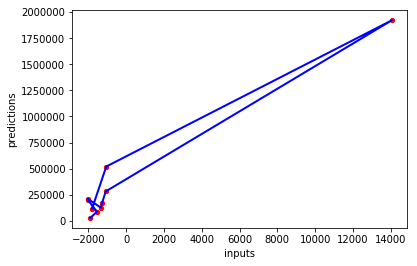

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_1d = pca.fit_transform(new_inputs1)
x_1d.ravel()
plt.scatter(x_1d.ravel(), predictions, color='r', s=18)
#y_pred, y_fit,
plt.plot(x_1d.ravel(), predictions, color='b', linewidth=2, label = 'Linear regression\n'+'reg_label')
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

In [37]:
new_inputs2 = np.array([ 6.60000000e+00,  6.21000000e+02,  1.32600000e+03,  -5.88567149e+00,  2.30000000e+00,  2.83000000e+00,   2.80000000e+00,  3.62318061e+00,  2.60000000e+00])
predictions = model.predict(new_inputs2.reshape(1, -1))
print(predictions)

new_inputs_up = np.array([ 9.60000000e+00,  9.21000000e+02,  0.32600000e+03,  5.88567149e+00,  3.30000000e+00,  1.83000000e+00,   1.80000000e+00,  1.62318061e+00,  4.60000000e+00])
predictions = model.predict(new_inputs_up.reshape(1, -1))
print(predictions)

new_inputs_down = np.array([ 5.60000000e+00,  5.21000000e+02,  2.32600000e+03,  -6.88567149e+00,  1.80000000e+00,  3.23000000e+00,   3.30000000e+00,  4.62318061e+00,  1.60000000e+00])
predictions = model.predict(new_inputs_down.reshape(1, -1))
print(predictions)

[234473.95315576]
[515208.43298398]
[76866.57356943]


In [38]:
new_inputs = np.array([[ 6.60000000e+00,  6.21000000e+02,  1.32600000e+03,  -5.88567149e+00,  2.30000000e+00,  2.83000000e+00,   2.80000000e+00,  3.62318061e+00,  2.60000000e+00],
       [ 4.50000000e+00,  3.85000000e+02,  9.30000000e+02,   3.10174247e+00,  3.12000000e+00,  1.72000000e+00,   1.43000000e+00,  7.79994189e+00,  5.00000000e-01],
       [ 6.30000000e+00,  1.07400000e+03,  1.86700000e+03,   9.36840249e-01,  1.67000000e+00,  5.11000000e+00,   2.27000000e+00,  4.69406217e+00,  7.00000000e-01],
       [ 4.30000000e+00,  9.00000000e+02,  1.65100000e+03,   2.46476236e+00,  2.11000000e+00,  6.26000000e+00,   4.70000000e+00,  4.08157421e+00,  5.50000000e+00],
       [ 4.50000000e+00,  8.12000000e+02,  1.46100000e+03,   1.61322058e+00,  1.92000000e+00,  5.77000000e+00,   4.33000000e+00,  6.91357601e+00,  4.46666667e+00],
       [ 6.80000000e+00,  6.66000000e+02,  1.51400000e+03,  -1.06550895e+01,  1.89000000e+00,  9.42000000e+00,   2.13000000e+00,  5.76349116e+00,  5.83333333e+00],
       [ 9.20000000e+00,  4.15000000e+02,  9.76000000e+02,  -2.83633570e+00,  2.33000000e+00,  1.34700000e+01,   1.27000000e+00,  7.40560669e+00,  2.30000000e+00],
       [ 8.90000000e+00,  4.77000000e+02,  7.09000000e+02,   1.34337920e+01,  2.75000000e+00,  7.73000000e+00,   5.60000000e+00,  8.90922651e+00,  3.33333333e-01],
       [ 5.20000000e+00,  5.11000000e+02,  1.38900000e+03,  -7.64093873e-01,  1.20000000e+00,  6.03000000e+00,   3.60000000e+00,  3.49405492e+00,  4.80000000e+00],
       [ 4.70000000e+00,  5.91000000e+02,  1.22300000e+03,  6.97363277e-01,  1.05000000e+00,   3.98000000e+00,   4.93000000e+00,  5.12848311e+00,  2.53333333e+00]])

In [39]:
predictions = model.predict(new_inputs)
print(predictions)

[234473.95315576 265540.99729926 220694.55358055 196128.57636515
 170248.85598431  91165.8203985   40140.63669822 164293.47077806
  87964.40455892 115572.31509881]


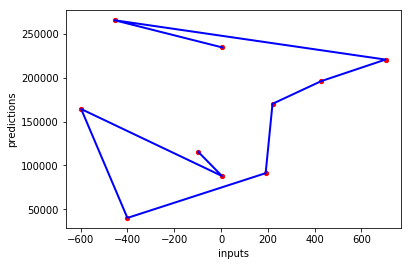

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_1d = pca.fit_transform(new_inputs)
x_1d.ravel()
plt.scatter(x_1d.ravel(), predictions, color='r', s=18)
#y_pred, y_fit,
plt.plot(x_1d.ravel(), predictions, color='b', linewidth=2, label = 'Linear regression\n'+'reg_label')
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()



In [43]:
# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=7)
print(scores)

[-3.81731410e+03 -1.30846523e+02 -1.31042459e+02 -1.44565844e+01
 -3.81379585e+00 -2.29810606e+01 -2.82797248e+01]


# Yes! As you can see, fitting a model with raw data doesn't give great results.


# Visualizing predicted values
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

Split the data (X and y) into training and test sets.
Use the training data to train the regression model.
Then use the testing data to generate predictions for the model.

You should be splitting up the arrays X and y into training and test sets with train_test_split().

Coefficient of Determination (R^2 )
The value of R is bounded on the top by 1, and can be infinitely low
Values closer to 1 mean the model does a better housing price of predicting outputs'''

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

housing_df.info()
X = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
y = np.array(housing_df['ASPUS_3A_PCT_CHG'])

# Split our data into training and test sets
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.295, random_state=42)
#
# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 58.8+ KB
0.278077940417225


In [52]:
print('r2_score for h_m_df (Transformed RAW Hosing Data) :')
X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.297, random_state=42)
#
# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

r2_score for h_m_df (Transformed RAW Hosing Data) :
0.5977151633811058


# PCA
use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

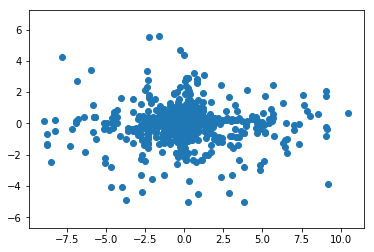

In [53]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(housing_df)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Variance of the PCA features

Index(['ASPUS_3A_PCT_CHG', 'H_RATIO_3A_PCT_CHG', 'HSN1F_3A_PCT_CHG',
       'PERMIT_3A_PCT_CHG', 'STOCK_MKT_3A_PCT_CHG', 'BAA_YEILD_10Y_2A_PCT_CHG',
       'US10Y_3A_PCT_CHG', 'RPCE_A_PCT_CHG', 'UEMP_3A_PCT_CHG',
       'RGDP_M_PCT_CHG'],
      dtype='object')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')


[Text(0, 0, 'ASPUS_3A_PCT_CHG'),
 Text(0, 0, 'H_RATIO_3A_PCT_CHG'),
 Text(0, 0, 'HSN1F_3A_PCT_CHG'),
 Text(0, 0, 'PERMIT_3A_PCT_CHG'),
 Text(0, 0, 'STOCK_MKT_3A_PCT_CHG'),
 Text(0, 0, 'BAA_YEILD_10Y_2A_PCT_CHG'),
 Text(0, 0, 'US10Y_3A_PCT_CHG'),
 Text(0, 0, 'RPCE_A_PCT_CHG'),
 Text(0, 0, 'UEMP_3A_PCT_CHG'),
 Text(0, 0, 'RGDP_M_PCT_CHG')]

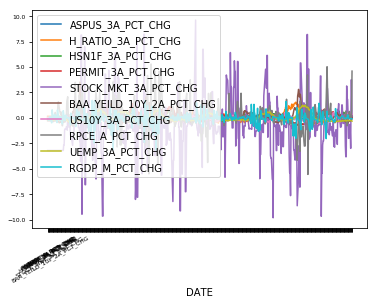

In [55]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(housing_df)
pca.n_components_

print(housing_df.columns)
columns = ['ASPUS_3A_PCT_CHG', 'H_RATIO_3A_PCT_CHG', 'HSN1F_3A_PCT_CHG',
       'PERMIT_3A_PCT_CHG', 'STOCK_MKT_3A_PCT_CHG', 'BAA_YEILD_10Y_2A_PCT_CHG',
       'US10Y_3A_PCT_CHG', 'RPCE_A_PCT_CHG', 'UEMP_3A_PCT_CHG', 'GDP_M']

ax = housing_df.plot( fontsize=6)
for x in ax.get_xticklabels(minor=False):
    #columns[::100]
    print(x)

ax.set_xticks(np.arange(len(housing_df.index)))
ax.set_xticklabels([case for case in housing_df.columns], rotation=30)


Now we want to know how many principal components we can choose for our new feature subspace? A useful measure is the so-called “explained variance ratio“. The explained variance ratio tells us how much information (variance) can be attributed to each of the principal components. We can plot bar graph between no. of features on X axis and variance ratio on Y axis

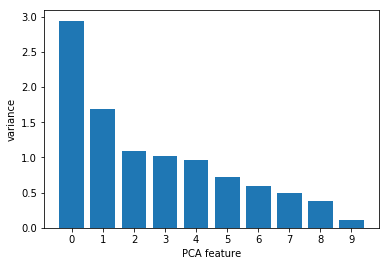

Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
Text(0, 0, '')
[   6.04707602  649.16081871 1366.92982456    1.69824992    2.03890351
    6.1895614     3.29181287    6.07639961    3.06725146]
[[-1.82472791e-03  4.33421453e-01  9.01181255e-01  1.16508874e-03
  -4.30761129e-04  7.83402042e-04  2.02852024e-03 -1.46480764e-03
   2.53820471e-03]
 [ 2.38241763e-03 -9.01154364e-01  4.33390467e-01 -2.68892167e-03
  -1.38402637e-03  6.85476733e-03  3.43015642e-03  3.27139874e-04
   4.45332727e-03]
 [ 6.90332159e-02  1.94795081e-03  1.27505806e-03 -9.61246691e-01
   5.93270119e-03 -1.03906807e-02 -1.73209104e-01 -6.78740156e-02
  -1.91003549e-01]
 [ 2.77590604e-01  9.40789459e-04  2.30032979e-03  1.97759595e-01
   5.55307457e-02  5.62832388e-01 -4.33454063e-01  1.67029513e-01
  -5.90070486e-01]
 [ 6.22742730e-02  7.52511187e-03 -5.76840279e-03 -1.76326752e-01
  -6.77437927e-02  7.52670437e-01  3.36928773e-01  1.99084429e-01
   4.90594816e-

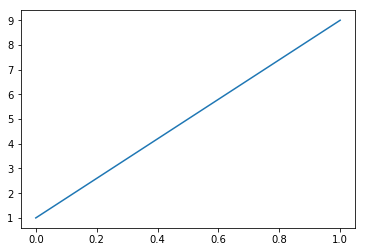

In [56]:
features = range(pca.n_components_)
feature_names = features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)

plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(feature_names)
plt.show()

plt.plot([1, 9])
#plt.plot(['ASPUS_3A_PCT_CHG', 'H_RATIO_3A_PCT_CHG', 'HSN1F_3A_PCT_CHG',       'PERMIT_3A_PCT_CHG', 'STOCK_MKT_3A_PCT_CHG', 'BAA_YEILD_10Y_2A_PCT_CHG',       'US10Y_3A_PCT_CHG', 'RPCE_A_PCT_CHG', 'UEMP_3A_PCT_CHG', 'GDP_M'])
ax = plt.gca()
labels = ax.get_xticklabels()
for label in labels:
    print(label)

pca.fit_transform(X)
print(pca.mean_)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.n_components_)
print(pca.noise_variance_)

# Finding Correlation between Features and Target Variable in housing Dataset using Heatmap

Text(0.5, 1.0, 'Correlation')

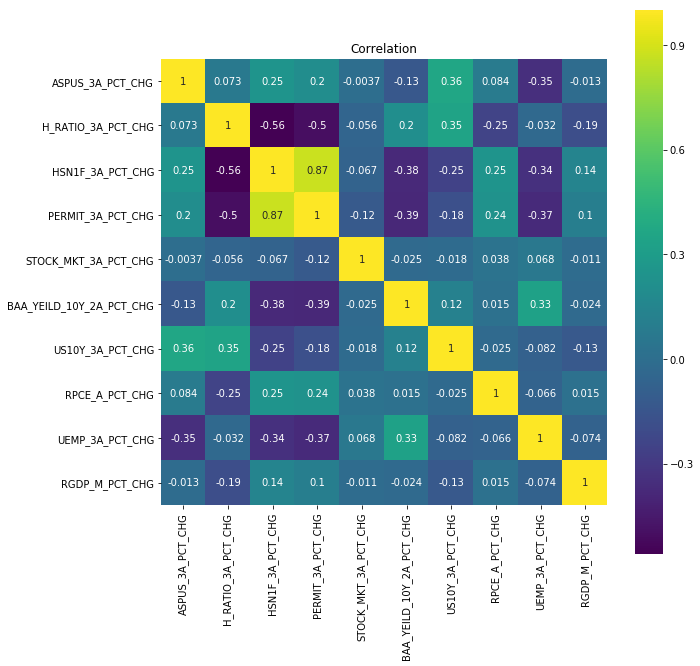

In [57]:
correlation = housing_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation')

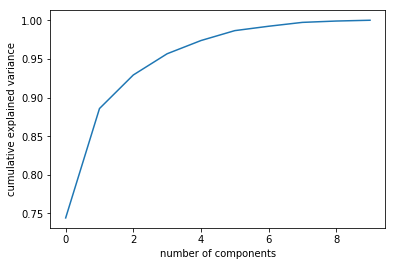

In [58]:
#Let us load the basic packages needed for the PCA analysis

pca = PCA().fit(housing_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

ValueError: too many values to unpack (expected 2)

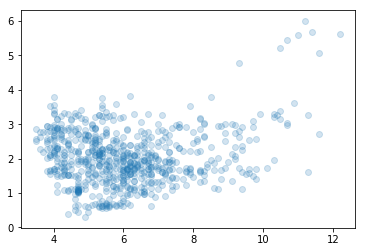

In [59]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 4], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

# PCA as dimensionality reduction
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [60]:
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (684, 9)
transformed shape: (684, 4)


The transformed data has been reduced to a 6 dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

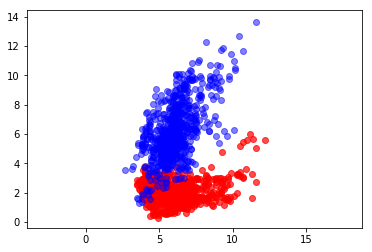

<Figure size 1152x1152 with 0 Axes>

In [61]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 4], alpha=0.7, c='red')
plt.scatter(X_new[:, 0], X_new[:, 5], alpha=0.5, c='blue')
plt.axis('equal');
#ylim(-20, 100)
#xlim(0,1800000)
plt.figure(figsize=(16,16))
plt.show()

# Fitting Linear Regression using sklearn

In [62]:
from sklearn.linear_model import LinearRegression

# This creates a LinearRegression object
lm = LinearRegression()

'''
lm.predit()
lm.fit()
lm.score()
lm.coef_
lm.intercept_

Fit a linear model
The lm.fit() function estimates the coefficients the linear regression using least squares.
'''
# Look inside lm object
dir(lm)

# Use all 13 predictors to fit linear regression model
lm.fit(X, y)
lm.coef_

lm.intercept_
housing_df.info()
# The mean squared error
print("Mean squared error (ASPUS_3A_PCT_CHG): %.2f" % np.mean((lm.predict(X) - y) ** 2))


<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 58.8+ KB
Mean squared error (ASPUS_3A_PCT_CHG): 5142067740.94


# Plot the time series in your DataFrame as a blue area chart


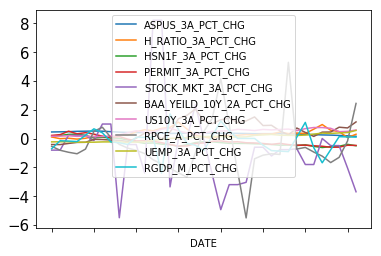

In [64]:
housing_subset_1 = housing_df['1/1/1979':'1/1/1982']
ax = housing_subset_1.plot(fontsize=15)


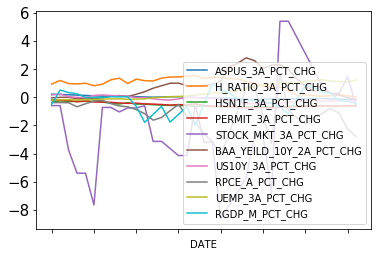

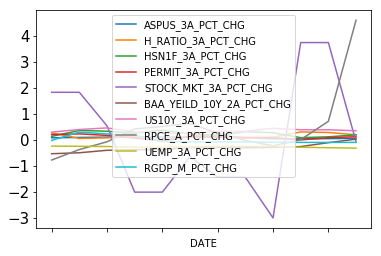

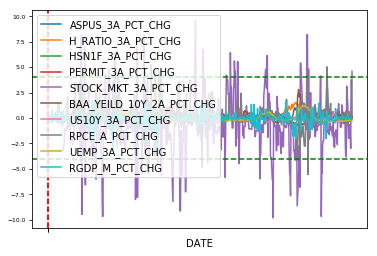

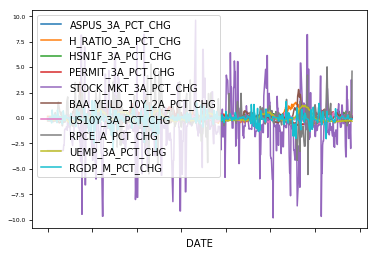

In [66]:
# Select the subset of data between 2007 and 2010
housing_subset_2 = housing_df['1/1/2007':'1/1/2010']

# Plot the time series in your DataFrame as a blue area chart
ax = housing_subset_2.plot(fontsize=15)

housing_subset_3 = housing_df['1/1/2018':'12/1/2018']

# Plot the time series in your DataFrame as a blue area chart
ax = housing_subset_3.plot(fontsize=15)

# Show plot
plt.show()

# Plot your the discoveries time series
ax = housing_df.plot( fontsize=6)

# Add a red vertical line
ax.axvline('1/1/2007', color='red', linestyle='--')
ax.axvline('1/1/2009', color='red', linestyle='--')


# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')
ax.axhline(-4, color='green', linestyle='--')

ax = housing_df.plot(fontsize=6)
plt.show()
# Add a vertical red shaded region between the dates of 2007-01-01 and 2008-101-01
ax.axvspan('9/1/2007', '10/12008', color='red', alpha=0.2)

# Add a horizontal green shaded region between the values of 6 and 8
ax.axhspan(-3, -4, color='green', alpha=0.2)

plt.show()

# Display rolling averages
It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" your data, and can be particularly useful when your time series contains a lot of noise or outliers. For a given DataFrame df, you can obtain the rolling average of the time series by using the command:

df_mean = df.rolling(window=12).mean()
The window parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to window=365. In addition, it is easy to get rolling values for other other metrics, such as the standard deviation (.std()) or variance (.var()).

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 78.8+ KB


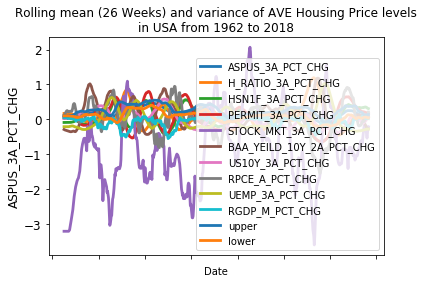

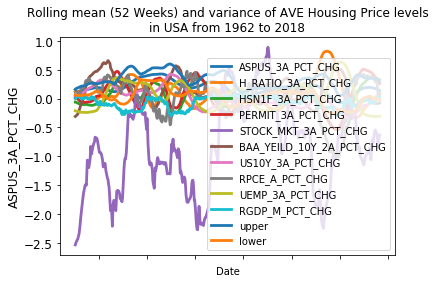

In [67]:
housing_df.info()
# Compute the 52 weeks rolling mean of the housing DataFrame
ma = housing_df.rolling(window=26).mean()

# Compute the 52 weeks rolling standard deviation of the  DataFrame
mstd = housing_df.rolling(window=26).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['ASPUS_3A_PCT_CHG'] + (mstd['ASPUS_3A_PCT_CHG'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['ASPUS_3A_PCT_CHG'] - (mstd['ASPUS_3A_PCT_CHG'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=2.8, fontsize=12)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('ASPUS_3A_PCT_CHG', fontsize=12)
ax.set_title('Rolling mean (26 Weeks) and variance of AVE Housing Price levels\nin USA from 1962 to 2018', fontsize=12)
plt.show()


ma = housing_df.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the housing DataFrame
mstd = housing_df.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['ASPUS_3A_PCT_CHG'] + (mstd['ASPUS_3A_PCT_CHG'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['ASPUS_3A_PCT_CHG'] - (mstd['ASPUS_3A_PCT_CHG'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=2.8, fontsize=12)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('ASPUS_3A_PCT_CHG', fontsize=12)
ax.set_title('Rolling mean (52 Weeks) and variance of AVE Housing Price levels\nin USA from 1962 to 2018', fontsize=12)
plt.show()

Showing the rolling mean and standard deviation of your data allows to get a more compact view of the data

# Display aggregated values
You may sometimes be required to display your data in a more aggregated form. For example, the co2_levels data contains weekly data, but you may need to display its values aggregated by month of year. In datasets such as the co2_levels DataFrame where the index is a datetime type, you can extract the year of each dates in the index:

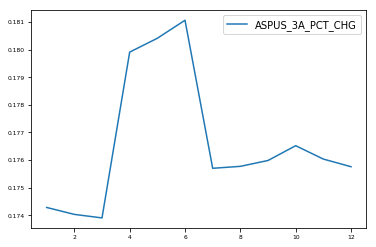

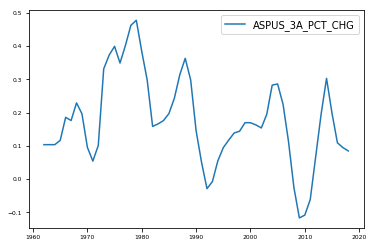

In [70]:
ASPUS = pd.read_csv('C:/scripts/capstone2/ASPUS2.csv', index_col=0)

ASPUS.index = pd.to_datetime(ASPUS.index)
ASPUS = ASPUS.reindex(pd.date_range(start='19620101', end='20181201', freq='1MS'))
ASPUS.head(20)

ASPUS_3A=ASPUS[['ASPUS_3A_PCT_CHG']]

# Get month for each dates in the index of housing data frame
index_month = ASPUS_3A.index.month

# Compute the mean ASPUS_3A for each month of the year
mean_ASPUS_3A_by_month = ASPUS_3A.groupby(index_month).mean()

# Plot the mean ASPUS_3A for each month of the year
mean_ASPUS_3A_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()


# Get year for each dates in the index of ASPUS_3A
index_year = ASPUS_3A.index.year

# Compute the mean ASPUS_3A for each month of the year
mean_ASPUS_3A_by_year = ASPUS_3A.groupby(index_year).mean()

# Plot the mean ASPUS_3A for each month of the year
mean_ASPUS_3A_by_year.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

No handles with labels found to put in legend.


       ASPUS_3A_PCT_CHG
0.100          0.018886
0.250          0.103627
0.500          0.164981
0.750          0.257386
0.900          0.374754
0.999          0.523785


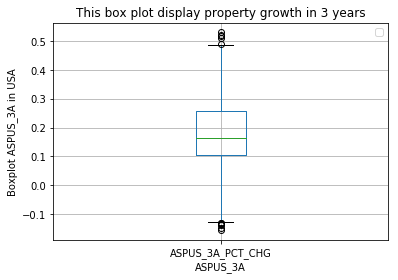

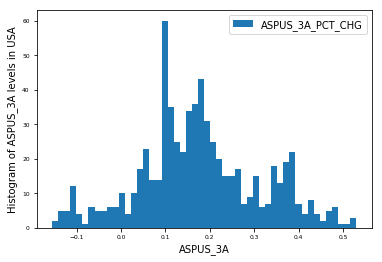

' Hopefully, this shows how boxplots can be a good graphical alternative to numerical summaries.'

In [71]:
# Generate a boxplot
ax = ASPUS_3A.boxplot()

# Set the labels and display the plot
ax.set_xlabel('ASPUS_3A', fontsize=10)
ax.set_ylabel('Boxplot ASPUS_3A in USA', fontsize=10)
plt.legend(fontsize=10)
print(ASPUS_3A.quantile([.10, 0.25, .50, .75, 0.90, .999]))
plt.title('This box plot display property growth in 3 years')
plt.show()

'''Use the .plot() method with kind = 'hist' along with the bins argument.'''


# Generate a histogram
ax = ASPUS_3A.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('ASPUS_3A', fontsize=10)
ax.set_ylabel('Histogram of ASPUS_3A levels in USA', fontsize=10)
plt.legend(fontsize=10)
plt.show()

''' Hopefully, this shows how boxplots can be a good graphical alternative to numerical summaries.'''

# Density plots
In practice, histograms can be a substandard method for assessing the distribution of data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data. An example of how to generate a density plot of is shown below:

ax = df.plot(kind='density', linewidth=2)
The standard .plot() method is specified with the kind argument set to 'density'. We also specified an additional parameter linewidth, which controls the width of the line to be plotted.

Using the ASPUS_3A DataFrame, produce a density plot of the ASPUS_3A data with line width parameter of 4.
Annotate the x-axis labels of your boxplot with the string 'ASPUS_3A'.
Annotate the y-axis labels of your boxplot with the string 'Density plot of ASPUS_3A levels in USA'.

Use the .plot() method with kind = 'density' along with the linewidth argument.
The x and y labels can be set using the .set_xlabel() and .set_ylabel() methods.

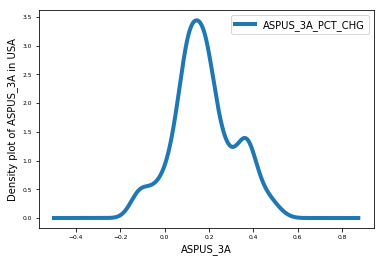

In [72]:
ax = ASPUS_3A.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('ASPUS_3A', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of ASPUS_3A in USA', fontsize=10)

plt.show()

In [73]:
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion is used

# Construct data for the model
type(housing_df)
#type(model)
housing_df.info()
X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("size of the training feature set is",X_train.shape)
print("size of the test feature set is",X_test.shape)
print("size of the training Target set is",y_train.shape)
print("size of the test Target set is",y_test.shape)

data = housing_df.as_matrix()
print(data)
data


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 78.8+ KB
size of the training feature set is (478, 9)
size of the test feature set is (206, 9)
size of the training Target set is (478,)
size of the test Target set is (206,)
[[ 0.10362694  0.17021277 -0.08629442 ... -0.11627907 -0.20703092
  -0.16438356]
 [ 0.10362694  0.17021277 -0.08629442 ... -0.11627907 -0.20703092
  -0.16438356]
 [ 0.10362694  0.17021277 

C:\Users\achow\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# Cross-validation with shuffling
As you'll recall, cross-validation is the process of splitting your data into training and test sets multiple times. Each time you do this, you choose a different training and test set. In this exercise, you'll perform a traditional ShuffleSplit cross-validation on the company value data from earlier. Later we'll cover what changes need to be made for time series data. The data we'll use is the same historical price data for several large companies.

An instance of the Linear regression object (model) is available in your workspace along with the function r2_score() for scoring. Also, the data is stored in arrays X and y. We've also provided a helper function (visualize_predictions()) to help visualize the results.

Initialize a ShuffleSplit cross-validation object with 10 splits.
Iterate through CV splits using this object. On each iteration:
Fit a model using the training indices.
Generate predictions using the test indices, score the model (R^2) using the predictions, and collect the results.

Use the ShuffleSplit() function with n_splits argument.
Use the .split() method of the cross-validation object to yield training indices (for fitting the model) and test indices (for scoring the model).
The r2_score function should take the actual and the predicted values as inputs, and returns the score.

In [75]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

def visualize_predictions(results):
    fig, axs = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

    # Loop through our model results to visualize them
    for ii, (prediction, score, indices) in enumerate(results):
        # Plot the predictions of the model in the order they were generated
        offset = len(prediction) * ii
        axs[0].scatter(np.arange(len(prediction)) + offset, prediction, label='Iteration {}'.format(ii))

        # Plot the predictions of the model according to how time was ordered
        axs[1].scatter(indices, prediction)
    axs[0].legend(loc="best")
    axs[0].set(xlabel="Test prediction number", title="Predictions ordered by test prediction number")
    axs[1].set(xlabel="Time", title="Predictions ordered by time")
    plt.show()

r2_score for h_m_s_df (Transformed RAW Hosing Data) :
0.576676633395743
0.6454216130137627
0.6399803883503089
0.5782451294300545
0.5581412884464076
0.5435636150165827
0.6423145330479761
0.5803362625210808
0.5667778422298352
0.4593433908848251


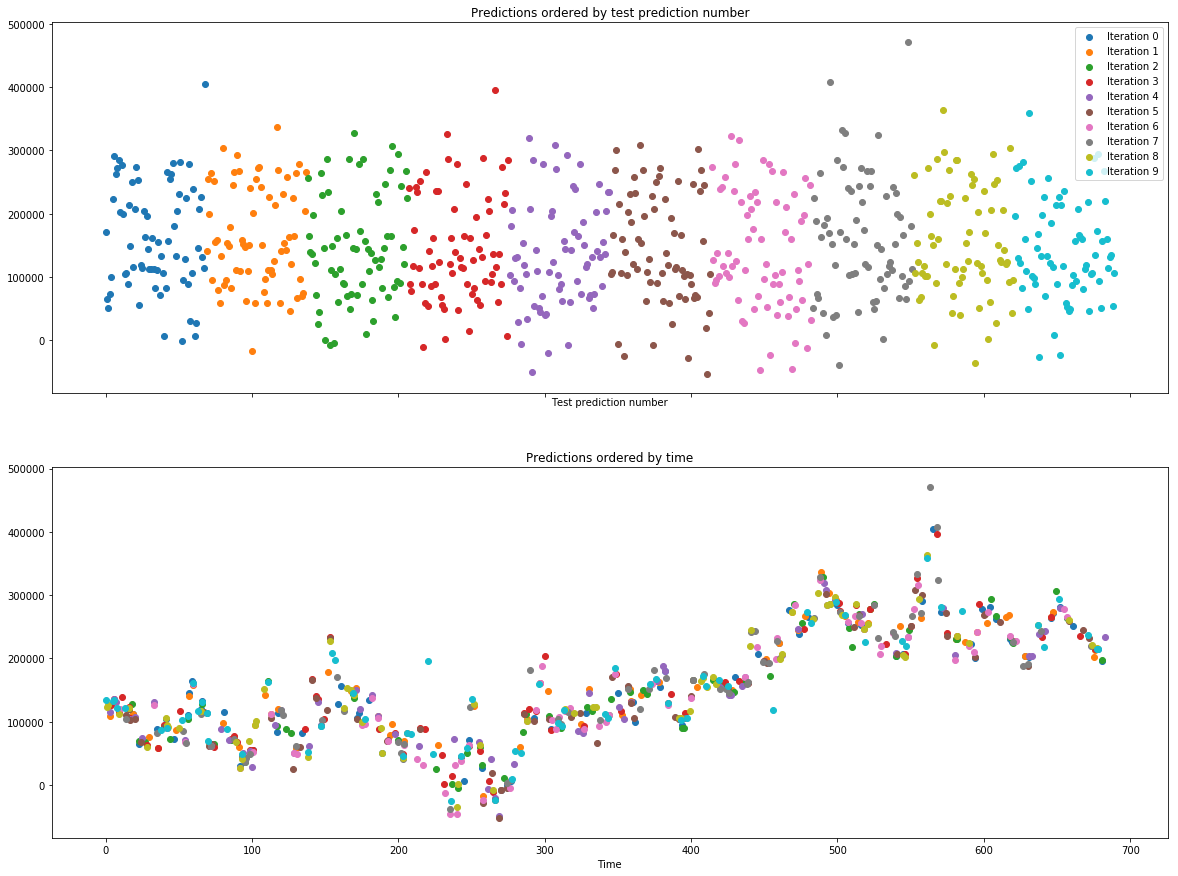

In [77]:
# Split our data into training and test sets
print('r2_score for h_m_s_df (Transformed RAW Hosing Data) :')
X = np.array(h_m_df.drop(['ASPUS_M'],1))
y = np.array(h_m_df['ASPUS_M'])

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.297, random_state=42)#


from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    X_train, X_test = X[tr], X[tt]
    y_train, y_test = y[tr], y[tt]
    model = Ridge()
    model.fit(X_train, y_train)

    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X_test)
    score = r2_score(y_test, prediction)
    results.append((prediction, score, tt))
    score = r2_score(y_test, prediction)
    print(score)

# Custom function to quickly visualize predictions
visualize_predictions(results)


<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1/1/1962 to 12/1/2018
Data columns (total 10 columns):
ASPUS_3A_PCT_CHG            684 non-null float64
H_RATIO_3A_PCT_CHG          684 non-null float64
HSN1F_3A_PCT_CHG            684 non-null float64
PERMIT_3A_PCT_CHG           684 non-null float64
STOCK_MKT_3A_PCT_CHG        684 non-null float64
BAA_YEILD_10Y_2A_PCT_CHG    684 non-null float64
US10Y_3A_PCT_CHG            684 non-null float64
RPCE_A_PCT_CHG              684 non-null float64
UEMP_3A_PCT_CHG             684 non-null float64
RGDP_M_PCT_CHG              684 non-null float64
dtypes: float64(10)
memory usage: 78.8+ KB
r2_score for h_m_s_df (Three years price differences) :
0.23771883289132523
0.3442269079481025
0.13288218456670953
0.37578869429035155
0.24599672901475622
0.43329393667123983
0.3297145160243694
0.2633919098454298
0.059352777241349575
0.1058845088149738


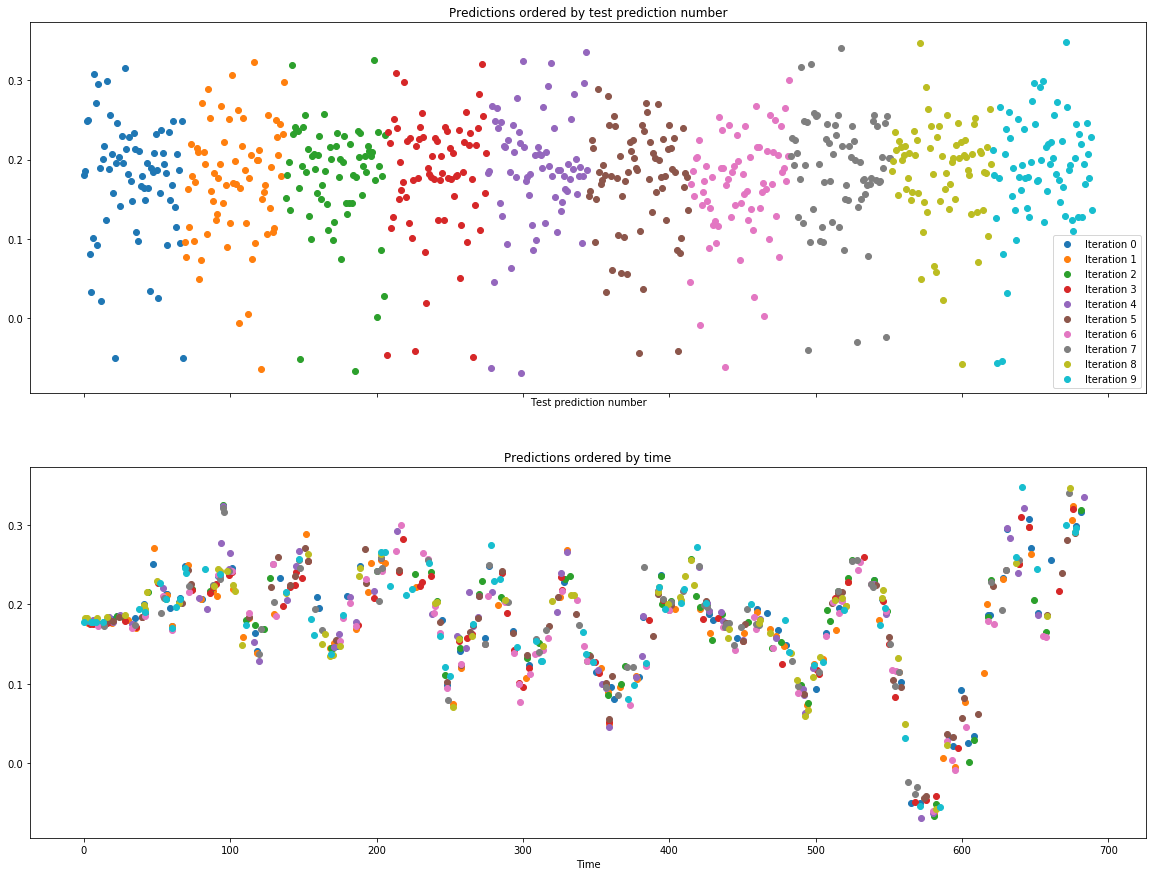

In [78]:
housing_df.info()

# Split our data into training and test sets
print('r2_score for h_m_s_df (Three years price differences) :')
X = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
y = np.array(housing_df['ASPUS_3A_PCT_CHG'])

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.297, random_state=42)#


from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

model = Ridge()
# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    X_train, X_test = X[tr], X[tt]
    y_train, y_test = y[tr], y[tt]
    
    model.fit(X_train, y_train)

    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X_test)
    score = r2_score(y_test, prediction)
    results.append((prediction, score, tt))
    score = r2_score(y_test, prediction)
    print(score)

# Custom function to quickly visualize predictions
visualize_predictions(results)

In [79]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # for train and test set split
from sklearn.model_selection import cross_val_score #Sklearn.model_seletion 
#from sklearn.model_selection import train_test_split


def pretty_print_linear(coefs, names = None, sort = False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

def scale_data(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

def split_data(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
    return X_train, X_test, Y_train, Y_test


def root_mean_square_error(y_pred,y_test):
    rmse_train = np.sqrt(np.dot(abs(y_pred-y_test),abs(y_pred-y_test))/len(y_test))
    return rmse_train



def plot_real_vs_predicted(y_pred,y_test):
    plt.plot(y_pred,y_test,'ro')
    plt.plot([0,50],[0,50], 'g-')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.title('real_vs_predicted           .@achowdhu')
    plt.show()
    return plt

In [80]:
np.set_printoptions(precision=2, linewidth=100, suppress=True, edgeitems=2)


X[10:15]
y[0:5]

array([0.1, 0.1, 0.1, 0.1, 0.1])

0.2392467827435114
Linear model:  0.067 * X1 + 0.055 * X5 + -0.031 * X7 + -0.026 * X2 + 0.017 * X0 + 0.004 * X3 + -0.003 * X4 + 0.002 * X6 + 0.001 * X8


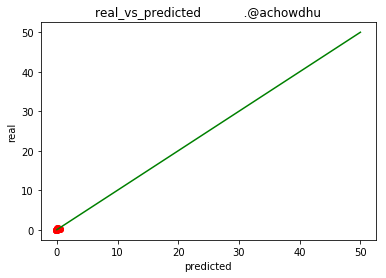

0.34223344592602856
Linear model:  0.07 * X1 + 0.054 * X5 + -0.031 * X2 + -0.03 * X7 + 0.016 * X0 + 0.005 * X6 + 0.004 * X3 + -0.002 * X4 + -0.0 * X8


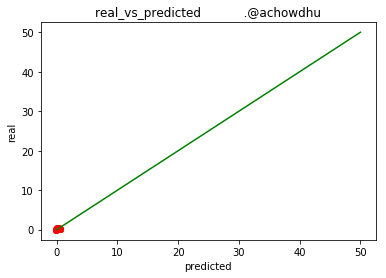

0.12875390751325078
Linear model:  0.07 * X1 + 0.056 * X5 + -0.028 * X7 + -0.027 * X2 + 0.018 * X0 + 0.005 * X6 + 0.005 * X3 + -0.004 * X4 + -0.0 * X8


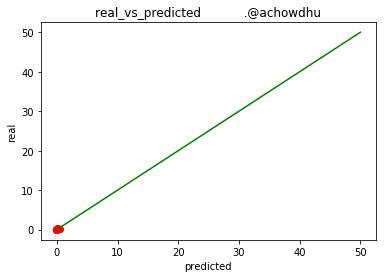

0.3780725405822103
Linear model:  0.066 * X1 + 0.055 * X5 + -0.029 * X7 + -0.028 * X2 + 0.013 * X0 + 0.006 * X3 + 0.005 * X6 + -0.003 * X4 + 0.0 * X8


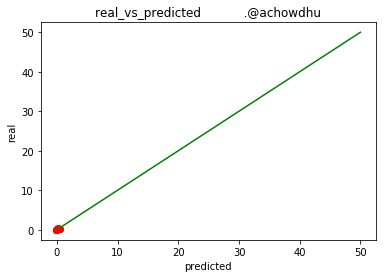

0.24685389594656293
Linear model:  0.066 * X1 + 0.056 * X5 + -0.03 * X7 + -0.025 * X2 + 0.016 * X0 + 0.006 * X6 + 0.005 * X3 + -0.003 * X4 + 0.001 * X8


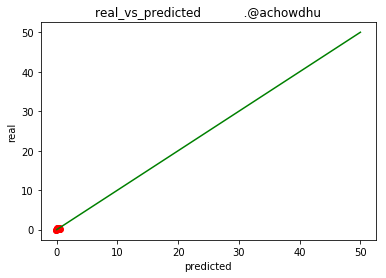

0.4366621147304315
Linear model:  0.067 * X1 + 0.053 * X5 + -0.028 * X2 + -0.028 * X7 + 0.015 * X0 + 0.004 * X6 + 0.004 * X3 + -0.003 * X4 + -0.002 * X8


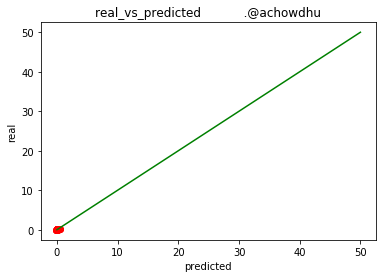

In [81]:
X = np.array(housing_df.drop(['ASPUS_3A_PCT_CHG'],1))
y = np.array(housing_df['ASPUS_3A_PCT_CHG'])

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.297, random_state=42)#

X = scale_data(X)

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=6, random_state=1)



model = LinearRegression()
# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    X_train, X_test = X[tr], X[tt]
    y_train, y_test = y[tr], y[tt]
    
    model.fit(X_train, y_train)

    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X_test)
    score = r2_score(y_test, prediction)
    results.append((prediction, score, tt))
    score = r2_score(y_test, prediction)
    print(score)
    # Print the root mean square error
    
    print("Linear model: ", pretty_print_linear(model.coef_, sort = True))
    plot_real_vs_predicted(y_test, prediction)

This time, the predictions generated within each CV loop look 'smoother' than they were before - they look more like a real time series because you didn't shuffle the data. This is a good sanity check to make sure your CV splits are correct.

Lasso model:  0.0 * X0 + 0.0 * X1 + 0.0 * X2 + -0.0 * X3 + -0.0 * X4 + 0.0 * X5 + 0.0 * X6 + -0.0 * X7 + -0.0 * X8
Lasso model - Root Mean Square Error:  0.13224796383959375


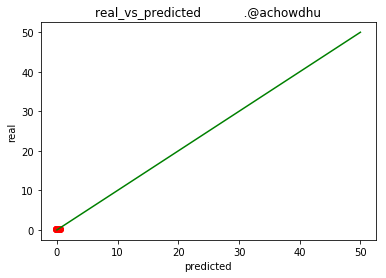

<module 'matplotlib.pyplot' from 'C:\\Users\\achow\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [82]:
lasso = Lasso(alpha=.3)

# Train the model using the training sets
lasso.fit(X_train, y_train)

print("Lasso model: ", pretty_print_linear(lasso.coef_, sort = True))

# Predict the values using the model
y_lasso_predict = lasso.predict(X_test)

# Print the root mean square error
print("Lasso model - Root Mean Square Error: ", root_mean_square_error(y_lasso_predict,y_test))
plot_real_vs_predicted(y_test,y_lasso_predict)


# Now let's try to do regression via Elastic Net.

Elastic Net model:  0.0 * X0 + 0.0 * X1 + 0.0 * X2 + -0.0 * X3 + -0.0 * X4 + 0.0 * X5 + 0.0 * X6 + -0.0 * X7 + -0.0 * X8
Elastic Net - Root Mean Square Error:  0.13224796383959375


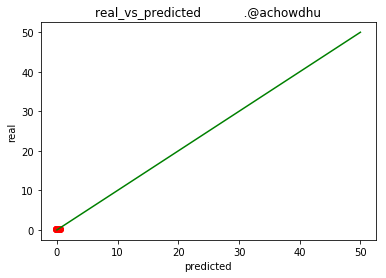

<module 'matplotlib.pyplot' from 'C:\\Users\\achow\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [83]:
elnet = ElasticNet(fit_intercept=True, alpha=.3)

# Train the model using the training sets
elnet.fit(X_train, y_train)

print("Elastic Net model: ", pretty_print_linear(elnet.coef_, sort = True))

# Predict the values using the model
y_elnet_predict = elnet.predict(X_test)

# Print the root mean square error
print("Elastic Net - Root Mean Square Error: ", root_mean_square_error(y_elnet_predict,y_test))
plot_real_vs_predicted(y_test,y_elnet_predict)

# Now let's try to do regression via Stochastic Gradient Descent.

Stochastic Gradient Descent model:  0.045 * X5 + 0.037 * X1 + -0.026 * X7 + 0.011 * X0 + 0.004 * X6 + -0.004 * X4 + 0.004 * X3 + -0.003 * X2 + -0.001 * X8
Stochastic Gradient Descent - Root Mean Square Error:  0.10132967059807045


C:\Users\achow\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


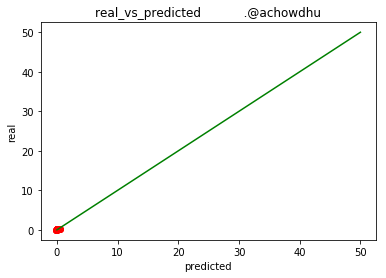

<module 'matplotlib.pyplot' from 'C:\\Users\\achow\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [84]:
sgdreg = SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Train the model using the training sets
sgdreg.fit(X_train, y_train)

print("Stochastic Gradient Descent model: ", pretty_print_linear(sgdreg.coef_, sort = True))

# Predict the values using the model
y_sgdreg_predict = sgdreg.predict(X_test)

# Print the root mean square error
print("Stochastic Gradient Descent - Root Mean Square Error: ", root_mean_square_error(y_sgdreg_predict,y_test))
plot_real_vs_predicted(y_test,y_sgdreg_predict)

# Time-based cross-validation
Finally, let's visualize the behavior of the time series cross-validation iterator in scikit-learn. Use this object to iterate through your data one last time, visualizing the training data used to fit the model on each iteration.

An instance of the Linear regression model object is available in your workpsace. Also, the arrays X and y (training data) are available too.

Import TimeSeriesSplit from sklearn.model_selection.
Instantiate a time series cross-validation iterator with 10 splits.
Iterate through CV splits. On each iteration, visualize the values of the input data that would be used to train the model for that iteration.

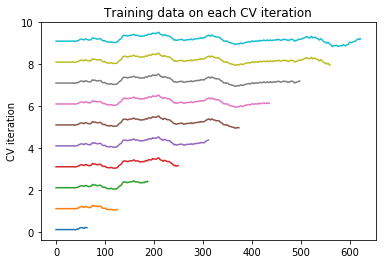

In [85]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    X_train, X_test = X[tr], X[tt]
    y_train, y_test = y[tr], y[tt]
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y_train)

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

Note that the size of the training set grew each time when you used the time series cross-validation object. This way, the time points you predict are always after the timepoints we train on.

# Bootstrapping a confidence interval
A useful tool for assessing the variability of some data is the bootstrap. Our own bootstrapping function that can be used to return a bootstrapped confidence interval.

This function takes three parameters: a 2-D array of numbers (data), a list of percentiles to calculate (percentiles), and the number of boostrap iterations to use (n_boots). It uses the resample function to generate a bootstrap sample, and then repeats this many times to calculate the confidence interval.

The function should loop over the number of bootstraps (given by the parameter n_boots) and:
Take a random sample of the data, with replacement, and calculate the mean of this random sample
Compute the percentiles of bootstrap_means and return it

To randomly sample data with replacement, use the resample() function from sklearn.utils.
To calculate the percentiles, use np.percentile().

In [86]:
from sklearn.utils import resample

def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create empty array to fill the results
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        X_train, X_test = X[tr], X[tt]
        y_train, y_test = y[tr], y[tt]
        # Generate random indices for data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)

    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    print('\nbootstrap_means, percentiles :', percentiles)
    return percentiles

'''You can use this function to assess the variability of your model coefficients.'''

'You can use this function to assess the variability of your model coefficients.'

In [87]:
# Iterate through CV splits
n_splits = 50
cv = TimeSeriesSplit(n_splits=n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    X_train, X_test = X[tr], X[tt]
    y_train, y_test = y[tr], y[tt]
    # Fit the model on training data and collect the coefficients
    model.fit(X_train, y_train)
    coefficients[ii] = model.coef_
    print('\ncoefficients[ii]:', coefficients[ii])


coefficients[ii]: [0. 0. 0. 0. 0. 0. 0. 0. 0.]

coefficients[ii]: [-0.06 -0.03  0.08 -0.01  0.    0.04  0.   -0.01  0.  ]

coefficients[ii]: [-0.07 -0.05  0.05 -0.02  0.02  0.1   0.   -0.    0.  ]

coefficients[ii]: [-0.04 -0.01 -0.04  0.01  0.    0.01 -0.   -0.04 -0.  ]

coefficients[ii]: [-0.04 -0.07  0.02  0.   -0.    0.07  0.   -0.02 -0.01]

coefficients[ii]: [-0.09 -0.12  0.06  0.   -0.    0.03 -0.01 -0.04 -0.  ]

coefficients[ii]: [-0.08 -0.1   0.05  0.01 -0.    0.02 -0.   -0.02 -0.  ]

coefficients[ii]: [-0.07 -0.08  0.05  0.    0.    0.02 -0.   -0.03 -0.  ]

coefficients[ii]: [ 0.05  0.04  0.03  0.01  0.03  0.03 -0.01 -0.08 -0.  ]

coefficients[ii]: [ 0.09  0.07  0.01  0.02  0.03  0.03 -0.   -0.08 -0.  ]

coefficients[ii]: [ 0.08  0.07 -0.05  0.03  0.02  0.03 -0.   -0.03 -0.  ]

coefficients[ii]: [ 0.04  0.07 -0.09  0.03  0.    0.02 -0.02  0.   -0.01]

coefficients[ii]: [ 0.02  0.09 -0.09  0.04 -0.01  0.02 -0.02  0.   -0.01]

coefficients[ii]: [ 0.02  0.12 -0.07  0.03 -0.01  0

Finally, calculate the 95% confidence interval for each coefficient in coefficients using the bootstrap_interval() function we have defined earlier. You can run bootstrap_interval? if you want a refresher on the parameters that this function takes.

Call bootstrap_interval() on coefficients


bootstrap_means, percentiles : [[ 0.01  0.05 -0.05  0.01 -0.    0.05 -0.01 -0.04 -0.  ]
 [ 0.03  0.09 -0.03  0.01  0.    0.06 -0.   -0.03  0.  ]]


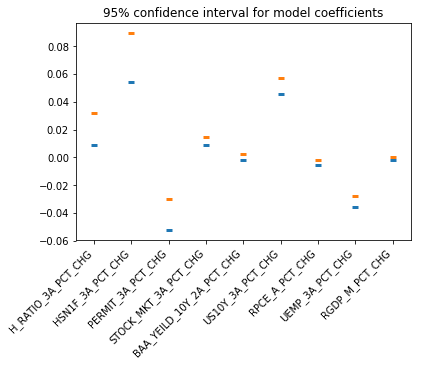

In [88]:
#'ASPUS_3A_PCT_CHG', 
feature_names = (['H_RATIO_3A_PCT_CHG', 'HSN1F_3A_PCT_CHG', 'PERMIT_3A_PCT_CHG', 'STOCK_MKT_3A_PCT_CHG', 'BAA_YEILD_10Y_2A_PCT_CHG',
'US10Y_3A_PCT_CHG', 'RPCE_A_PCT_CHG', 'UEMP_3A_PCT_CHG', 'RGDP_M_PCT_CHG'])

# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()